In [176]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [177]:
def get_api8():
    ####
    api8=pd.read_csv("http://ae-ct1capp001/positions_data/API8weekly.csv", header=None).set_index(0).drop([2,3,4,5], axis=1)
    api8.index=pd.to_datetime(api8.index)
    api8=api8.rename(columns={1:"API8 CFR South China  6000 NAR"})
    api8=api8.assign(Date=api8.index)
    ####
    return api8
api8 = get_api8()
api8.describe()

,API8 CFR South China 6000 NAR,Date
count,31.000000,31
mean,104.686452,2024-04-19 00:00:00
min,99.690000,2024-01-05 00:00:00
25%,101.750000,2024-02-26 12:00:00
50%,104.740000,2024-04-19 00:00:00
75%,107.255000,2024-06-10 12:00:00
max,111.520000,2024-08-02 00:00:00
std,3.283732,NaN


In [178]:
def get_lvPCIcfrChina():
    lvPCI = pd.read_csv("http://ae-ct1capp001/positions_data/LVPCIChinadaily.csv", header=None).set_index(0).drop([2,3,4,5], axis=1)   
    lvPCI.index = pd.to_datetime(lvPCI.index)
    lvPCI=lvPCI.rename(columns={1:"Platts LV PCI CFR China"})
    lvPCI=lvPCI.assign(Date=lvPCI.index)
    return lvPCI

lvPCI = get_lvPCIcfrChina()
lvPCI=lvPCI[lvPCI.Date>=np.datetime64("2024-01-01")]
lvPCI.describe()

,Platts LV PCI CFR China,Date
count,149.000000,149
mean,145.132550,2024-04-18 07:53:33.422818816
min,130.000000,2024-01-02 00:00:00
25%,143.000000,2024-02-23 00:00:00
50%,146.500000,2024-04-18 00:00:00
75%,149.000000,2024-06-12 00:00:00
max,160.000000,2024-08-05 00:00:00
std,5.984747,NaN


In [179]:
def plot_predict(df):
    df["Days"]=(df.Date - df.Date[0])
    x = df.Days.dt.days.values.reshape(-1,1)
    Y = df[df.columns[0]]
    reg = LinearRegression().fit(x, Y)

    y_reg = reg.predict(x)

    xP=pd.date_range(max(df.Date), np.datetime64("2024-12-31"))
    xPv=np.arange(max(df.Days).days, max(df.Days).days + len(xP))
    xPv = xPv.reshape(-1,1)
    y_fut = reg.predict(xPv)

    np.mean(np.concatenate([y_reg,y_fut]))
    return Y, y_reg, xP, xPv, y_fut, reg

def plot_predicted(df, Y, y_reg, xP, xPv, y_fut, reg):
    ax = plt.subplot()
    ax.plot(df.Date, Y,  color='green')
    ax.plot(df.Date, y_reg, color='blue')


    ax.plot(xP, y_fut, "--", color='cornflowerblue')


    ax.legend([df.columns[0].split()[0], "Regression", "Forecast"])
    ax.grid()
    ax.set_title(df.columns[0].split()[0] + " 2024, USD")



C:\Users\Fraynt\AppData\Local\Temp\ipykernel_27092\1751610018.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["Days"]=(df.Date - df.Date[0])


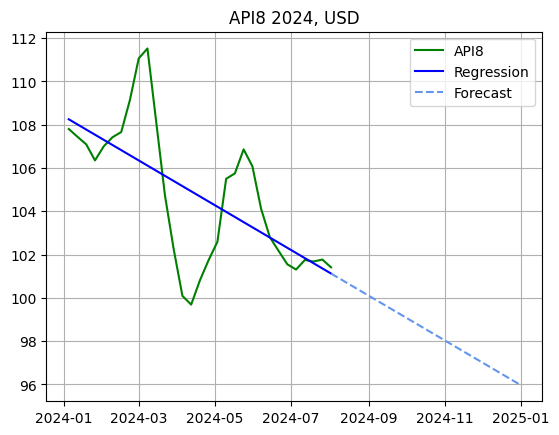

In [180]:
Y, y_reg, xP, xPv, y_fut, reg = plot_predict(api8)
plot_predicted(api8, Y, y_reg, xP, xPv, y_fut, reg)

In [181]:
np.mean(np.concatenate([y_reg,y_fut]))

99.599329719725

C:\Users\Fraynt\AppData\Local\Temp\ipykernel_27092\1751610018.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["Days"]=(df.Date - df.Date[0])


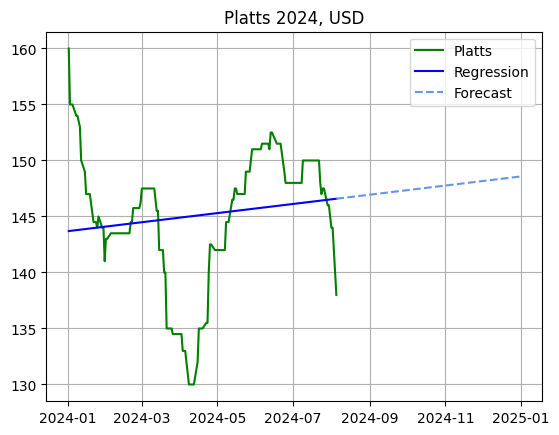

In [182]:
Y, y_reg, xP, xPv, y_fut, reg = plot_predict(lvPCI)
plot_predicted(lvPCI, Y, y_reg, xP, xPv, y_fut, reg)

In [183]:
np.mean(np.concatenate([y_reg,y_fut]))

146.3530249015697